<a href="https://colab.research.google.com/github/iterat1on/class/blob/main/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
pd.set_option('display.max_columns', 300)
df = pd.read_csv('/content/drive/MyDrive/df_done.csv')
df = df[df['s_teukbyul_si/do'] == '부산광역시']
df = df[df.path.str.contains('공항앞길')]
df.to_csv('/content/drive/MyDrive/sample_data/final_data.csv')

In [4]:
def a(x):
  if '공항로' in x:
    return '공항로'

  else:
    return x

In [5]:
df['path11'] = df['road_1'].apply(lambda x: a(x))
df['path22'] = df['road_2'].apply(lambda x: a(x))
df['path33'] = df['road_3'].apply(lambda x: a(x))

In [6]:
l3 = []
for i in range(len(df)) :
   a = [df['path11'].iloc[i], df['path22'].iloc[i], df['path33'].iloc[i]]
   l3.append(a)

In [7]:
transaction = np.array(l3)
transaction[1:4]

array([['공항앞길', '-', '-'],
       ['공항앞길', '-', '-'],
       ['공항앞길', '-', '-']], dtype='<U11')

In [8]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [9]:
te = TransactionEncoder()
te_result = te.fit(transaction).transform(transaction)
te_result

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [10]:
df_2 = pd.DataFrame(te_result, columns=te.columns_)

In [11]:
frequent_itemsets = apriori(df_2, min_support=0.01, use_colnames=True)


In [12]:
frequent_itemsets.sort_values('support', ascending= False)

,support,itemsets
2,0.986954,(공항앞길)
0,0.784247,(-)
10,0.778213,"(-, 공항앞길)"
6,0.296314,(공항진입로)
19,0.295010,"(공항앞길, 공항진입로)"
1,0.242172,(공항로)
13,0.235486,"(공항앞길, 공항로)"
12,0.234181,"(-, 공항진입로)"
24,0.233855,"(-, 공항앞길, 공항진입로)"
9,0.074364,"(-, 공항로)"


In [13]:
df['path33'].iloc[0]

'-'

### 누락 레코드 제거

In [15]:
df2 = df[['s'+str(i) for i in range(20, 160, 10)]]
df2.head()
min_value = np.array([np.arange(20, 160, 10)]).T
med_value = np.array([np.arange(25, 165, 10)]).T
max_value = np.array([np.arange(30, 170, 10)]).T


df['min_est_dist'] = np.dot(df2, min_value)/3600
df['med_est_dist'] = np.dot(df2, med_value)/3600
df['max_est_dist'] = np.dot(df2, max_value)/3600

df['diff1'] = np.abs(df['root_dist(km)'] - df['min_est_dist'])
df['diff2'] = np.abs(df['root_dist(km)'] - df['med_est_dist'])
df['diff3'] = np.abs(df['root_dist(km)'] - df['max_est_dist'])

In [16]:
df = df[(df['diff1'] < np.mean(df['root_dist(km)'])) & (df['diff2'] < np.mean(df['root_dist(km)'])) & (df['diff3'] < np.mean(df['root_dist(km)']))]

In [17]:
df

,s_date,e_date,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,s70,s80,s90,s100,s110,s120,s130,s140,s150,start_gps,end_gps,distance,airport_start,airport_end,start_add,end_add,s_teukbyul_si/do,s_teukbyulsi/goon/gu,s_dong/eup/myun,e_teukbyulsi/do,e_teukbyulsi/goon/gu,e_dong/eup/myun,road_list,fee,s_Datetime,e_Datetime,s_hour,day_or_night,road_1,road_2,road_3,path,duration(min),root_dist(km),path11,path22,path33,min_est_dist,med_est_dist,max_est_dist,diff1,diff2,diff3
258,2022-05-30 6:00,2022-05-30 7:00,35.176815,128.950878,35.177655,128.950687,2484.36,3,3,0,0,0,0,0,0,0,0,0,0,0,0,"35.176815, 128.9508783","35.1776549, 128.9506866",0.095004,True,True,부산광역시 강서구 대저2동 2162-2,부산광역시 강서구 대저2동 2157,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,미확인 공항앞길 51m,3800,2022-05-30 06:00:00,2022-05-30 07:00:00,6,1,공항앞길,-,-,"공항앞길,-,-",1,0.118,공항앞길,-,-,0.041667,0.050000,0.058333,0.076333,0.068000,0.059667
263,2022-07-09 7:00,2022-07-09 7:00,35.176773,128.950893,35.177155,128.950517,1049.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.1767733, 128.9508933","35.177155, 128.9505166",0.054531,True,True,부산광역시 강서구 공항앞길 116,부산광역시 강서구 대저2동 2161,부산광역시,강서구,공항앞길,부산광역시,강서구,대저2동,미확인 공항앞길 51m,3800,2022-07-09 07:00:00,2022-07-09 07:00:00,7,1,공항앞길,-,-,"공항앞길,-,-",1,0.057,공항앞길,-,-,0.000000,0.000000,0.000000,0.057000,0.057000,0.057000
386,2022-03-02 6:00,2022-03-02 6:00,35.179807,128.953510,35.176867,128.950805,1547.00,44,9,0,0,0,0,0,0,0,0,0,0,0,0,"35.1798066, 128.95351","35.1768666, 128.950805",0.409040,True,True,부산광역시 강서구 대저2동 2060-2,부산광역시 강서구 대저2동 2162-2,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,미확인 공항앞길 421m,3800,2022-03-02 06:00:00,2022-03-02 06:00:00,6,1,공항앞길,-,-,"공항앞길,-,-",1,0.436,공항앞길,-,-,0.319444,0.393056,0.466667,0.116556,0.042944,0.030667
387,2022-03-04 7:00,2022-03-04 7:00,35.176855,128.950900,35.176283,128.951048,927.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.176855, 128.9509","35.1762833, 128.9510483",0.064983,True,True,부산광역시 강서구 대저2동 2162-2,부산광역시 강서구 공항앞길 113,부산광역시,강서구,대저2동,부산광역시,강서구,공항앞길,미확인 공항앞길 16m,3800,2022-03-04 07:00:00,2022-03-04 07:00:00,7,1,공항앞길,-,-,"공항앞길,-,-",1,0.019,공항앞길,-,-,0.000000,0.000000,0.000000,0.019000,0.019000,0.019000
389,2022-03-07 12:00,2022-03-07 12:00,35.176848,128.950687,35.173125,128.952195,1523.61,23,44,0,0,0,0,0,0,0,0,0,0,0,0,"35.1768483, 128.9506866","35.1731249, 128.952195",0.436132,True,True,부산광역시 강서구 공항앞길 116,부산광역시 강서구 공항앞길163번길 95-1,부산광역시,강서구,공항앞길,부산광역시,강서구,공항앞길163번길,서행 공항앞길 438m 미확인 공항앞길163번길 103m,3800,2022-03-07 12:00:00,2022-03-07 12:00:00,12,1,공항앞길,공항앞길163번길,-,"공항앞길,공항앞길163번길,-",1,0.584,공항앞길,공항앞길163번길,-,0.494444,0.587500,0.680556,0.089556,0.003500,0.096556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15444,2021-10-27 3:00,2021-10-27 3:00,35.180422,128.955143,35.176812,128.950690,1738.88,42,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.1804216, 128.9551433","35.1768116, 128.95069",0.570044,True,True,부산광역시 강서구 대저2동 2024-4,부산광역시 강서구 공항앞길 116,부산광역시,강서구,대저2동,부산광역시,강서구,공항앞길,미확인 공항로811번길 42m 미확인 공항앞길 566m,4550,2021-10-27 03:00:00,2021-10-27 03:00:00,3,0,공항로811번길,공항앞길,-,"공항로811번길,공항앞길,-",1,0.623,공항로,공항앞길,-,0.233333,0.291667,0.350000,0.389667,0.331333,0.273000
15463,2021-11-23 0:00,2021-11-23 0:00,35.176955,128.950508,35.176860,128.951038,1127.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.176955, 128.9505083","35.17686, 128.9510383",0.049315,True,True,부산광역시 강서구 대저2동 2162-1,부산광역시 강서구 대저2동 2162-5,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,미확인 공항앞길 42m,4550,2021-11-23 00:00:00,2021-11-23 00:00:00,0,0,공항앞길,-,-,"공항앞길,-,-",1,0.057,공항앞길,-,-,0.000000,0.000000,0.000000,0.057000,0.057000,0.057000
15469,2021-11-26 1:00,2021-11-26 1:00,35.176730,128.950697,35.180148,128.956110,2479.55,63,31,0,0,0,0,0,0,0,0,0,0,0,0,"35.17673, 128.9506966","35.1801483, 128.95611",0.621726,True,True,부산광역시 강서구 공항앞길 116,부산광역시 강서구 대저2동 1840-4,부산광역시,강서구,공항앞길,부산광역시,강서구,대저2동,미확인 공항앞길 311m 미확인 공항진입로 536m,4550,2021-11-26 01:00:00,2021-11-26 01:00:00,1,0,공항앞길,공항진입로,-,"공항앞길

###주행 총 레코드가 0인 데이터 제거

In [18]:
df = df[df['max_est_dist'] > 0]

##1차 클러스터링(지역 및 비슷한 운행으로 군집)

###지역 원핫인코딩(부산으로만 필터링하면 안해도 될듯)

In [ ]:
#df = pd.get_dummies(data = df, columns = ['s_teukbyul_si/do'], prefix = 's_teukbyul_si/do')

###정규화

In [19]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['duration(min)', 'root_dist(km)', 'fee']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

###PCA

In [20]:
from sklearn.decomposition import PCA
X = data_scale.copy()

pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X)

In [21]:
pca_df = pd.DataFrame(x_pca, columns=['pc1', 'pc2'])
pca_df

,pc1,pc2
0,-0.149530,-0.055295
1,-0.113759,-0.047452
2,-0.097111,-0.043802
3,-0.097111,-0.043802
4,-0.149530,-0.055295
...,...,...
2614,-0.053420,0.108704
2615,-0.063881,0.106410
2616,-0.069843,0.105103
2617,-0.059044,0.107470


In [22]:
x = [] 
y = []  

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_df)
    
    x.append(k)
    y.append(kmeans.inertia_)

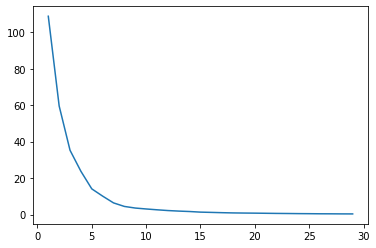

In [23]:
plt.plot(x, y);

In [24]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(pca_df)
pca_df['clusters'] = clusters.labels_

In [25]:
pca_df.clusters.value_counts()


1    1643
0     692
2     254
3      30
Name: clusters, dtype: int64

In [26]:
#df = df.drop(columns = ['level_0', 'index'])
df.reset_index(inplace = True)

In [27]:
cluster_df = pd.concat([df, pca_df], axis = 1)
newdf = cluster_df[cluster_df.clusters == 1]

In [28]:
newdf.road_3.value_counts()

-             1558
공항앞길            53
공항진입로           10
공항로811번나길        8
공항앞길33번길         7
공항앞길85번길         2
공항로791번길         2
공항로811번가길        2
유통단지1로58번길       1
Name: road_3, dtype: int64

##모델링

##최적의 k 찾기(엘보우 기법)

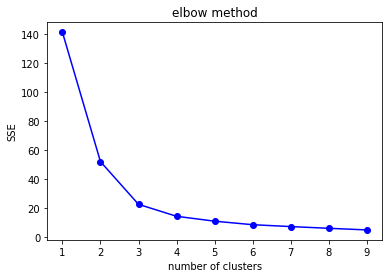

In [ ]:
# 엘보우 기법 (오차제곱합의 값이 최소가 되도록 결정하는 방법)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data_scale, 10)

###클러스터링 시각화

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'duration(min)'], df.loc[df['cluster'] == i, 'root_dist(km)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('duration(min)', size = 12)
plt.ylabel('root_dist(km)', size = 12)
plt.show()

In [ ]:
df_short = df[df.cluster == 0]
df_mid= df[df.cluster == 4]
df_long = df[df.cluster == 1]

###folium을 통해 경로 시각화

In [ ]:
import folium
center = [36.6,126.99]
m= folium.Map(location = center, zoom_start = 12)

In [ ]:

newdf['s'] = newdf[['s_lat','s_lng']].values[:].tolist()
newdf['e'] = newdf[['e_lat','e_lng']].values[:].tolist()


for i in range(len(newdf)):
  line = newdf[['s','e']].values[i].tolist()
  folium.PolyLine(locations = line, tooltip = 'Polyline').add_to(m)

m

##2차 클러스터링(성향을 기준으로 클러스터링)

##속도 파생변수 생성

In [ ]:
newdf.road_1.unique()

In [ ]:
##속도구간이 30 40 50 정도라고 생각.
#newdf['time_sum'] = newdf['s20'] + newdf['s30'] + newdf['s40'] + newdf['s50']+ newdf['s60']+newdf['s70']+newdf['s80']+newdf['s90']+newdf['s100']+newdf['s110']+newdf['s120']+newdf['s130']+newdf's140']+newdf['s150']
#newdf['fasttime_sum'] = newdf['s60']+newdf['s70']+df_short['s80']+newdf['s90']+newdf['s100']+newdf['s110']+newdf's120']+newdf['s130']+newdf's140']+newdf['s150']
newdf['ratio'] = newdf['fasttime_sum']/newdf['time_sum']

In [ ]:
#df_short = df_short[df_short['time_sum'] != 0]
df_short

###파생변수 생성후 다시 2차 클러스터링 진행

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#feature를 대상
data = df_short[['max_rpm', 'fasttime_sum','ratio']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_short['cluster'] = model.fit_predict(data_scale)

In [ ]:
df_short['cluster'].value_counts()

0    6881
1    1080
Name: cluster, dtype: int64

In [ ]:
df_short[df_short.cluster == 0].describe()

,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,s70,s80,s90,s100,s110,s120,s130,s140,s150,distance,fee,s_hour,day_or_night,duration(min),root_dist(km),cluster,time_sum,fasttime_sum,ratio
count,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.0,6881.0,6881.0,6881.0,6881.0,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.0,6881.000000,6881.000000,6881.000000
mean,35.175212,128.951033,35.175192,128.950883,1977.993008,52.616190,49.407063,33.133701,17.870658,4.011336,0.937654,0.148380,0.027903,0.001889,0.0,0.0,0.0,0.0,0.0,0.422925,4383.676791,6.727511,0.491498,1.825461,0.790439,0.0,158.154774,5.127162,0.020042
std,0.010359,0.006349,0.011514,0.007681,453.520355,64.504918,62.964166,47.285539,30.232949,10.340490,4.490692,1.254034,0.578270,0.104392,0.0,0.0,0.0,0.0,0.0,0.663888,967.176436,6.150228,0.499964,1.516545,1.109071,0.0,177.010933,12.707703,0.044643
min,35.100283,128.900160,35.079637,128.872520,-0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000793,3800.000000,0.000000,0.000000,1.000000,0.001000,0.0,1.000000,0.000000,0.000000
25%,35.176690,128.950797,35.176758,128.950768,1685.250000,15.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.040137,3800.000000,2.000000,0.000000,1.000000,0.029000,0.0,46.000000,0.000000,0.000000
50%,35.176823,128.950977,35.176898,128.950890,1903.530000,35.000000,33.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.156174,4550.000000,5.000000,0.000000,1.000000,0.560000,0.0,111.000000,0.000000,0.000000
75%,35.177087,128.952083,35.177040,128.951123,2183.620000,69.000000,69.000000,50.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.606181,4550.000000,9.000000,1.000000,2.000000,1.100000,0.0,199.000000,0.000000,0.000000
max,35.199863,128.969433,35.268160,129.009243,6054.950000,1445.000000,1318.000000,919.000000,377.000000,122.000000,110.000000,26.000000,25.000000,7.000000,0.0,0.0,0.0,0.0,0.0,8.703362,14610.000000,23.000000,1.000000,11.000000,9.100000,0.0,3405.000000,146.000000,0.230337


In [ ]:
df_short[df_short.cluster == 1].describe()

,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,s70,s80,s90,s100,s110,s120,s130,s140,s150,distance,fee,s_hour,day_or_night,duration(min),root_dist(km),cluster,time_sum,fasttime_sum,ratio
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.0,1080.0,1080.0,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.00000,1080.0,1080.000000,1080.000000,1080.000000
mean,35.166772,128.948816,35.168434,128.950251,2560.185403,38.552778,41.001852,42.911111,43.438889,46.422222,23.351852,9.381481,2.909259,1.009259,0.412963,0.091667,0.0,0.0,0.0,1.970000,6306.629630,6.121296,0.443519,4.015741,2.90265,1.0,249.483333,83.578704,0.372484
std,0.021771,0.011964,0.027195,0.021418,697.146362,43.634455,43.375038,48.029508,54.163929,44.380876,29.530530,19.047349,9.872642,5.984836,4.098624,2.078605,0.0,0.0,0.0,1.763576,2507.897208,5.778192,0.497030,2.878564,2.50390,0.0,215.529655,70.841619,0.191078
min,35.100293,128.900080,35.079918,128.848627,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.001209,3800.000000,0.000000,0.000000,1.000000,0.00100,1.0,1.000000,1.000000,0.072289
25%,35.160372,128.950578,35.158345,128.950711,2101.895000,11.000000,12.000000,12.000000,10.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.266137,4550.000000,2.000000,0.000000,1.000000,0.62025,1.0,134.000000,37.000000,0.241537
50%,35.176717,128.950925,35.176881,128.950935,2408.390000,26.000000,29.000000,29.000000,30.000000,35.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.860037,5510.000000,5.000000,0.000000,3.000000,2.70000,1.0,191.000000,63.000000,0.311134
75%,35.176889,128.953210,35.177852,128.955890,2892.780000,51.000000,58.000000,57.000000,59.250000,62.250000,33.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.195060,8030.000000,8.000000,1.000000,6.000000,4.90000,1.0,329.000000,113.000000,0.435159
max,35.199747,128.969762,35.268002,129.051532,5727.022949,372.000000,447.000000,530.000000,689.000000,427.000000,211.000000,140.000000,113.000000,72.000000,76.000000,65.000000,0.0,0.0,0.0,9.526790,14690.000000,23.000000,1.000000,11.000000,10.00000,1.0,2465.000000,767.000000,1.000000


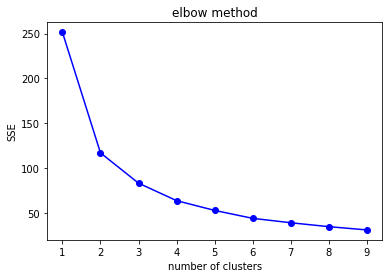

In [ ]:
# 엘보우 기법 (오차제곱합의 값이 최소가 되도록 결정하는 방법)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data_scale, 10)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df_short.loc[df_short['cluster'] == i, 'duration(min)'], df_short.loc[df['cluster'] == i, 'root_dist(km)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('duration(min)', size = 12)
plt.ylabel('root_dist(km)', size = 12)
plt.show()

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/sample_data/제한속도realnew.csv', encoding = 'utf-8',header=None)

In [ ]:
u = a.iloc[:181]
u

,0,1
0,명지국제12로19번길',30.0
1,'공항로767번길',30.0
2,'호계로422번길',30.0
3,'남해고속도로',0.0
4,'중앙고속도로(삼락-대동)',60.0
...,...,...
176,"'낙동대로1048번길',",50.0
177,"'도도본리길',",30.0
178,"'명지오션시티1로',",50.0
179,"'영강길',",30.0
